# 10 - Exploratory Data Analysis with Well Log Data
**Created By:** Andy McDonald  
**Link to Article**: 
<br><br>
Once data has been collated and sorted through, the next step in the Data Science process is to carry out Exploratory Data Analysis (EDA). This step allows us to identify patterns within the data, understand relationships between the features (well logs) and identify possible outliers that may exist within the dataset. In this stage, we gain an understanding about the data and check whether further processing is required or if cleaning is necessary.  
  
As petrophysicists/geoscientists we commonly use log plots, histograms and crossplots (scatter plots) to analyse and explore well log data. Python provides a great toolset for visualising the data from different perspectives in a quick and easy way.  
  
In this notebook we will use a subset of the dataset that was released by Xeek and FORCE as part of a competition to predict facies from well logs. We will be visualising the data using a mixture of matplotlib, seaborn and missingno data visualisation libraries.

## Loading the Data and Libraries
The first step for any project is loading the required libraries and the data. 
For this workthrough, we are going to call upon a number of plotting libraries: seaborn, matplotlib and missingno as well as math, pandas, and numpy.  

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import missingno as msno
import numpy as np

The dataset we are using forms part of a Machine Learning competition run by Xeek and FORCE (https://xeek.ai/challenges/force-well-logs/overview). The objective of the competition was to predict lithology from a dataset consisting 98 training wells each with varying degrees of log completeness. The target was to predict lithofacies based on the log measurements.  
  
In order to keep the plots and data manageable in this article I have used a subset of 12 wells from the training data. The data has already been collated into a single csv file with no need to worry about curve mnemonics. To load the subset of data in we can call upon pd.read_csv.

In [32]:
data = pd.read_csv('Data/xeek_train_subset.csv')
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528000,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680000,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832000,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984000,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136000,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,476770.12500,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,22.291321,NaN,NaN,0.107520,NaN,NaN,NaN,NaN,30000,2.0
133194,16/2-16,2207.462396,476770.15625,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,22.230320,NaN,NaN,0.101821,NaN,NaN,NaN,NaN,30000,2.0
133195,16/2-16,2207.614396,476770.15625,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,22.388054,NaN,NaN,0.097832,NaN,NaN,NaN,NaN,30000,2.0
133196,16/2-16,2207.766396,476770.15625,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,23.331690,NaN,NaN,0.092334,NaN,NaN,NaN,NaN,30000,2.0


Once the data has been loaded, we can confirm the number and names of the wells using the following commands:

In [33]:
data['WELL'].nunique()

12

In [34]:
data['WELL'].unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

## Identifying Gaps

The data is presented as is and includes a large amount of missing values. Missing data within well logging can arise for a number of reasons including:
* Tool failures & problems
* Missing by choice (i.e. tools not run due to budgetary constraints)
* Human error
* Vintage datasets
* Issues arising from the borehole environment

### missingno Library
There are a number of ways that we can use to identify where we have data and where we don't. 
The first method we will look at is using the missingno library, which provides a nice little toolbox, created by Aleksy Bilgour, as a way to visualise and understand data completeness. More details on the library can be found at https://github.com/ResidentMario/missingno. If you don't have this library, you can quickly install it using `pip install missingno` into your terminal.
The missingno toolbox contains a number of different visualisations, but for this article we will focus on the matrix plot. This can be called by:

<Axes: >

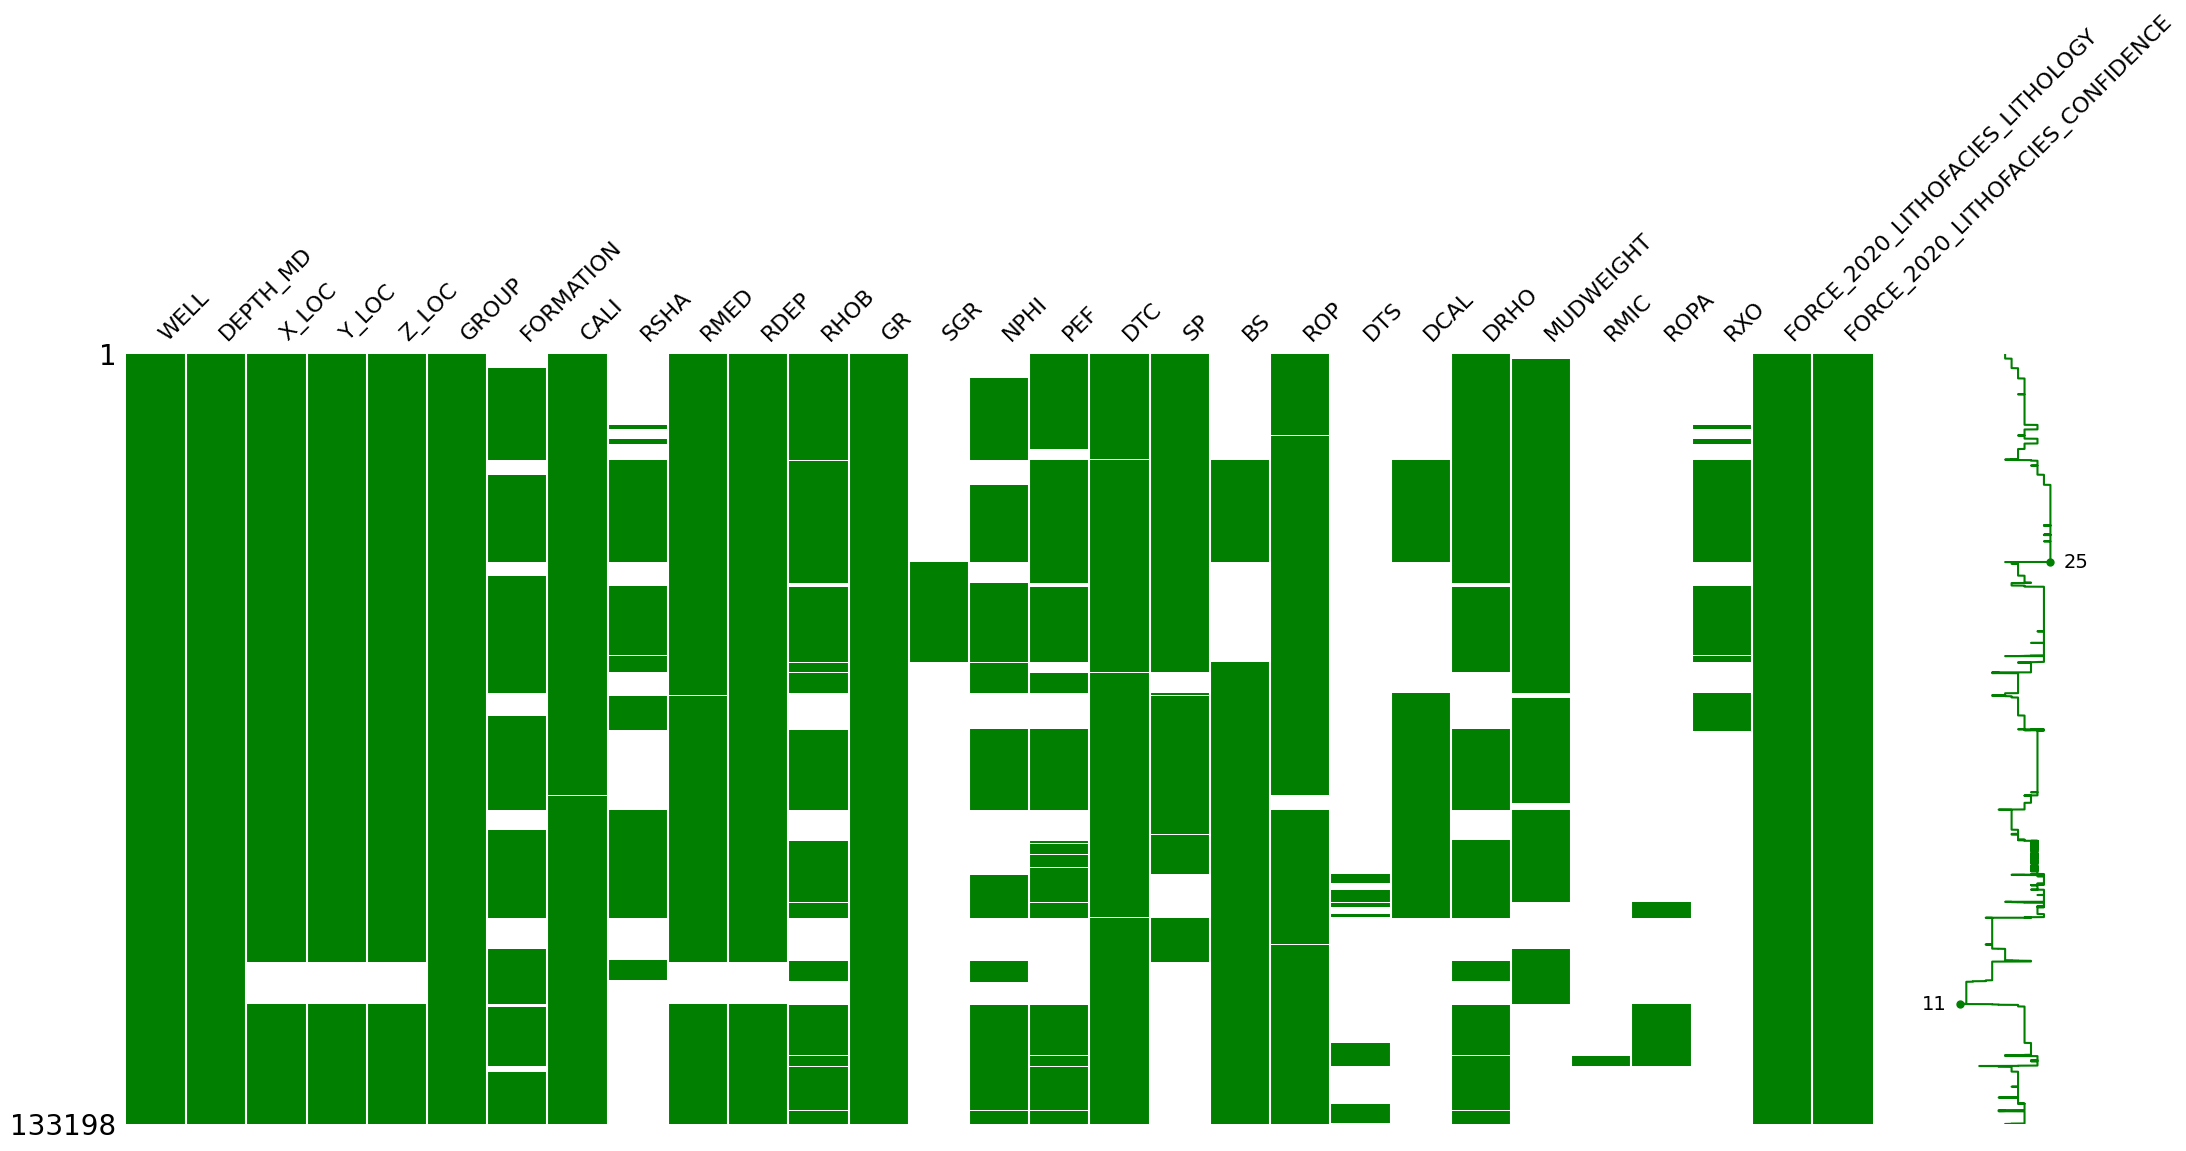

In [35]:
msno.matrix(data, color=(0, 0.5, 0))

This shows us the data density across all of the features (log curves). Over on the right hand side of the figure we have sparkline, which illustrates where we have maximum or minimum nullity in the data.
From the visualisation we can can see that only a handful of columns are complete WELL, DEPTH_MD, GR, GROUP, LITHOFACIES_LITHOLOGY and LITHOFACIES_CONFIDENCE.  
  
Others have near full data values such DTC, CALI, and ROP, whereas some have very poor data coverage such as RMIC, SGR and ROPA.  
  
We can also call upon `sno.bar(data)` to generate a bar chart showing the amount of non-null data values within each column (log curve). Along the top of the chart, we get a total count of the non-null data values.

<Axes: >

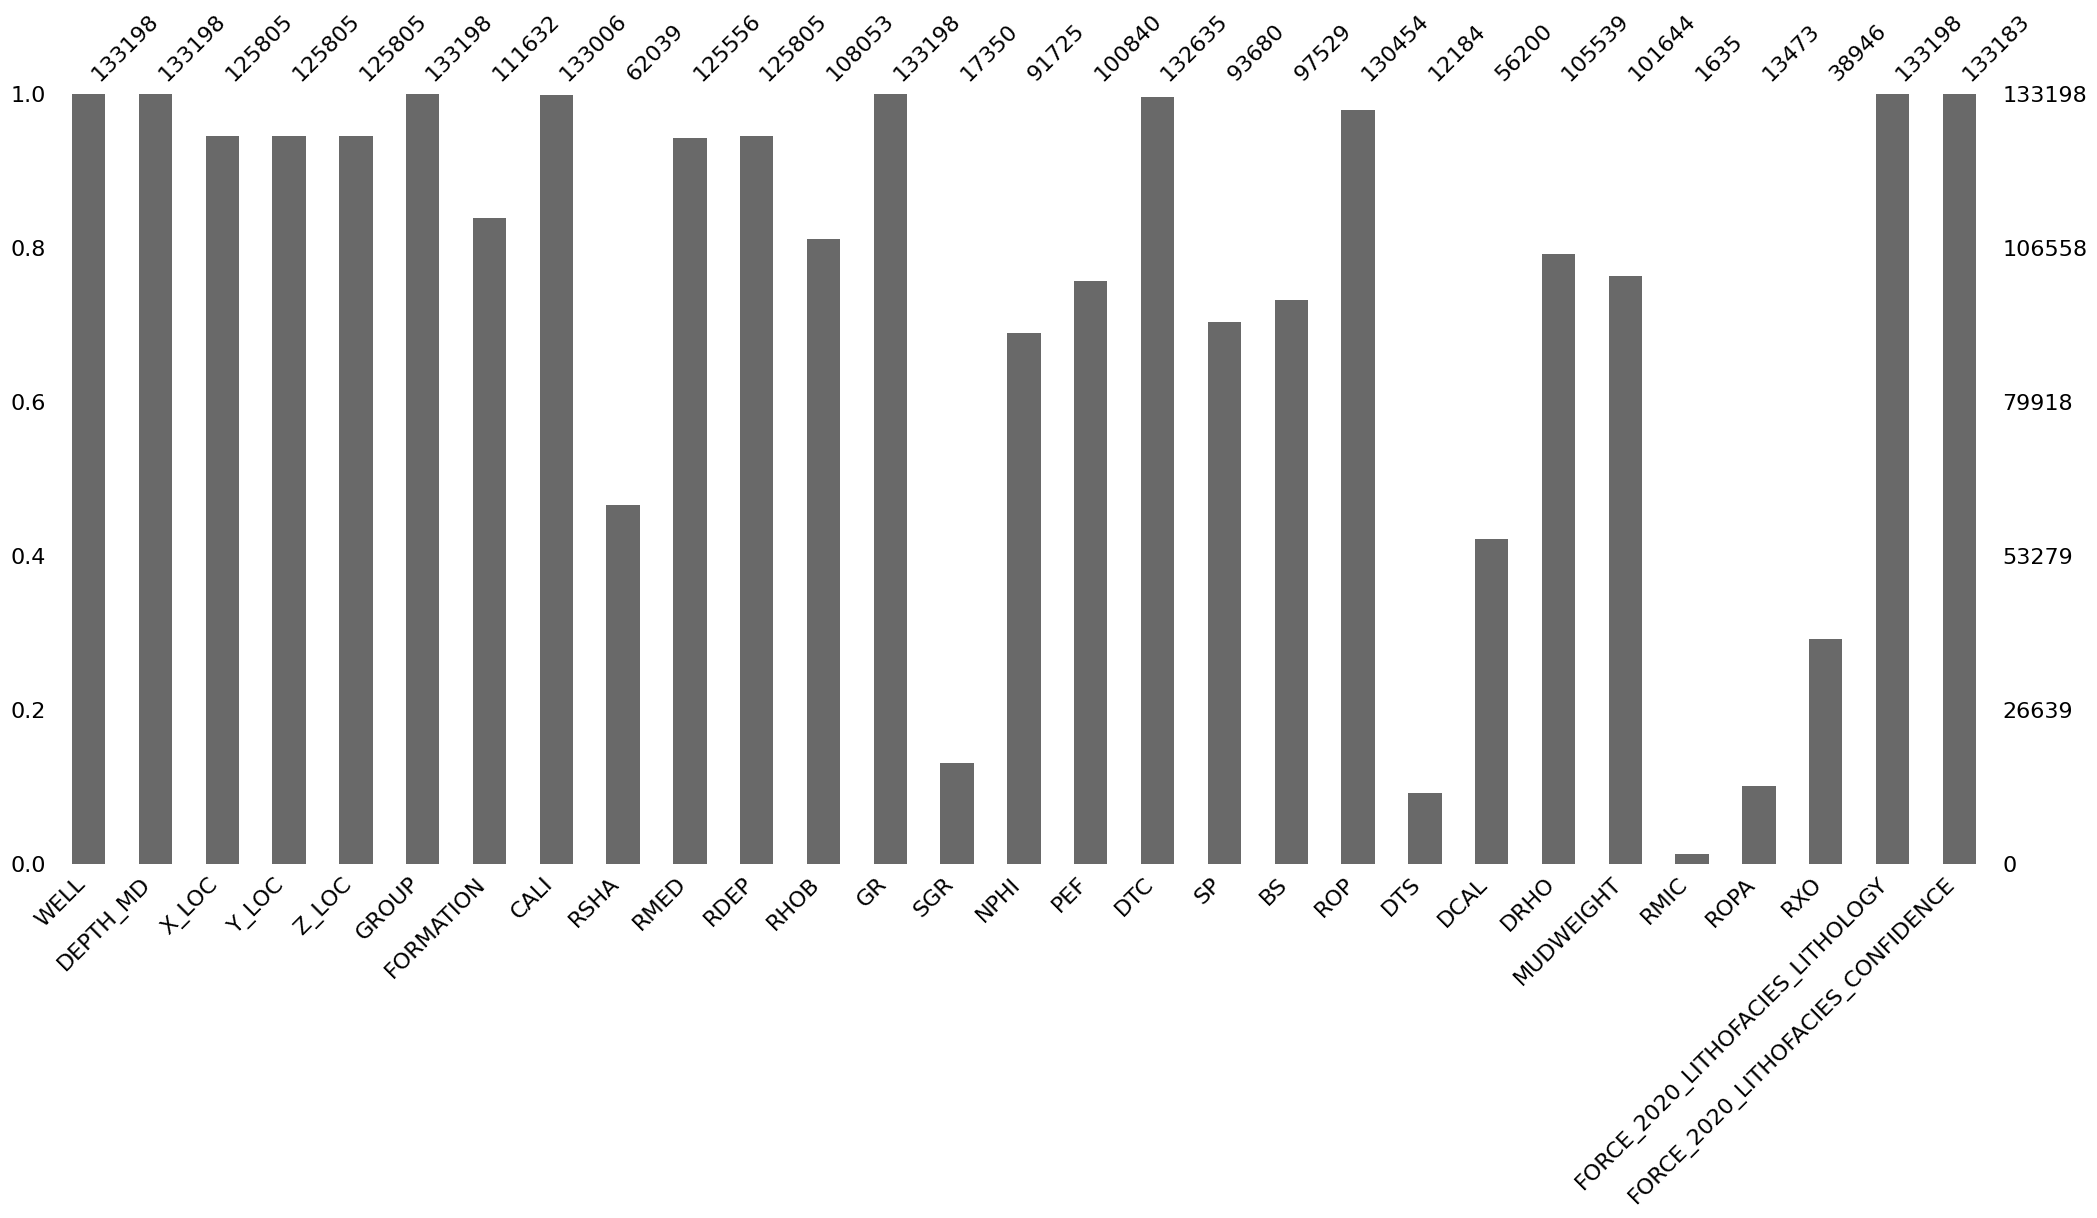

In [36]:
msno.bar(data)

With a quick glance at the matrix plot and bar chart, you can get a sense of what data is missing from your dataset, especially if you have a large number of columns in your dataset.

## Missing Data Visualisation Using Matplotlib

We can further visualise where we have missing data by using matplotlib and the function discussed in section 9 of this series. If we wanted to generate a plot for all of the curves per well we could save each one out as a file or present the data in a single column. In this example I have only selected common curves that a petrophysicist may use in an interpretation.

In [44]:
data_nan = data[['WELL','DEPTH_MD','CALI', 'BS', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']].copy()
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col] = data_nan[col].replace(0, num)
    print(col, num) #Print out the col name and number to verify it works
grouped = data_nan.groupby('WELL')

CALI 0
BS 1
GR 2
NPHI 3
RHOB 4
PEF 5
RDEP 6
RMED 7
DTC 8
DTS 9


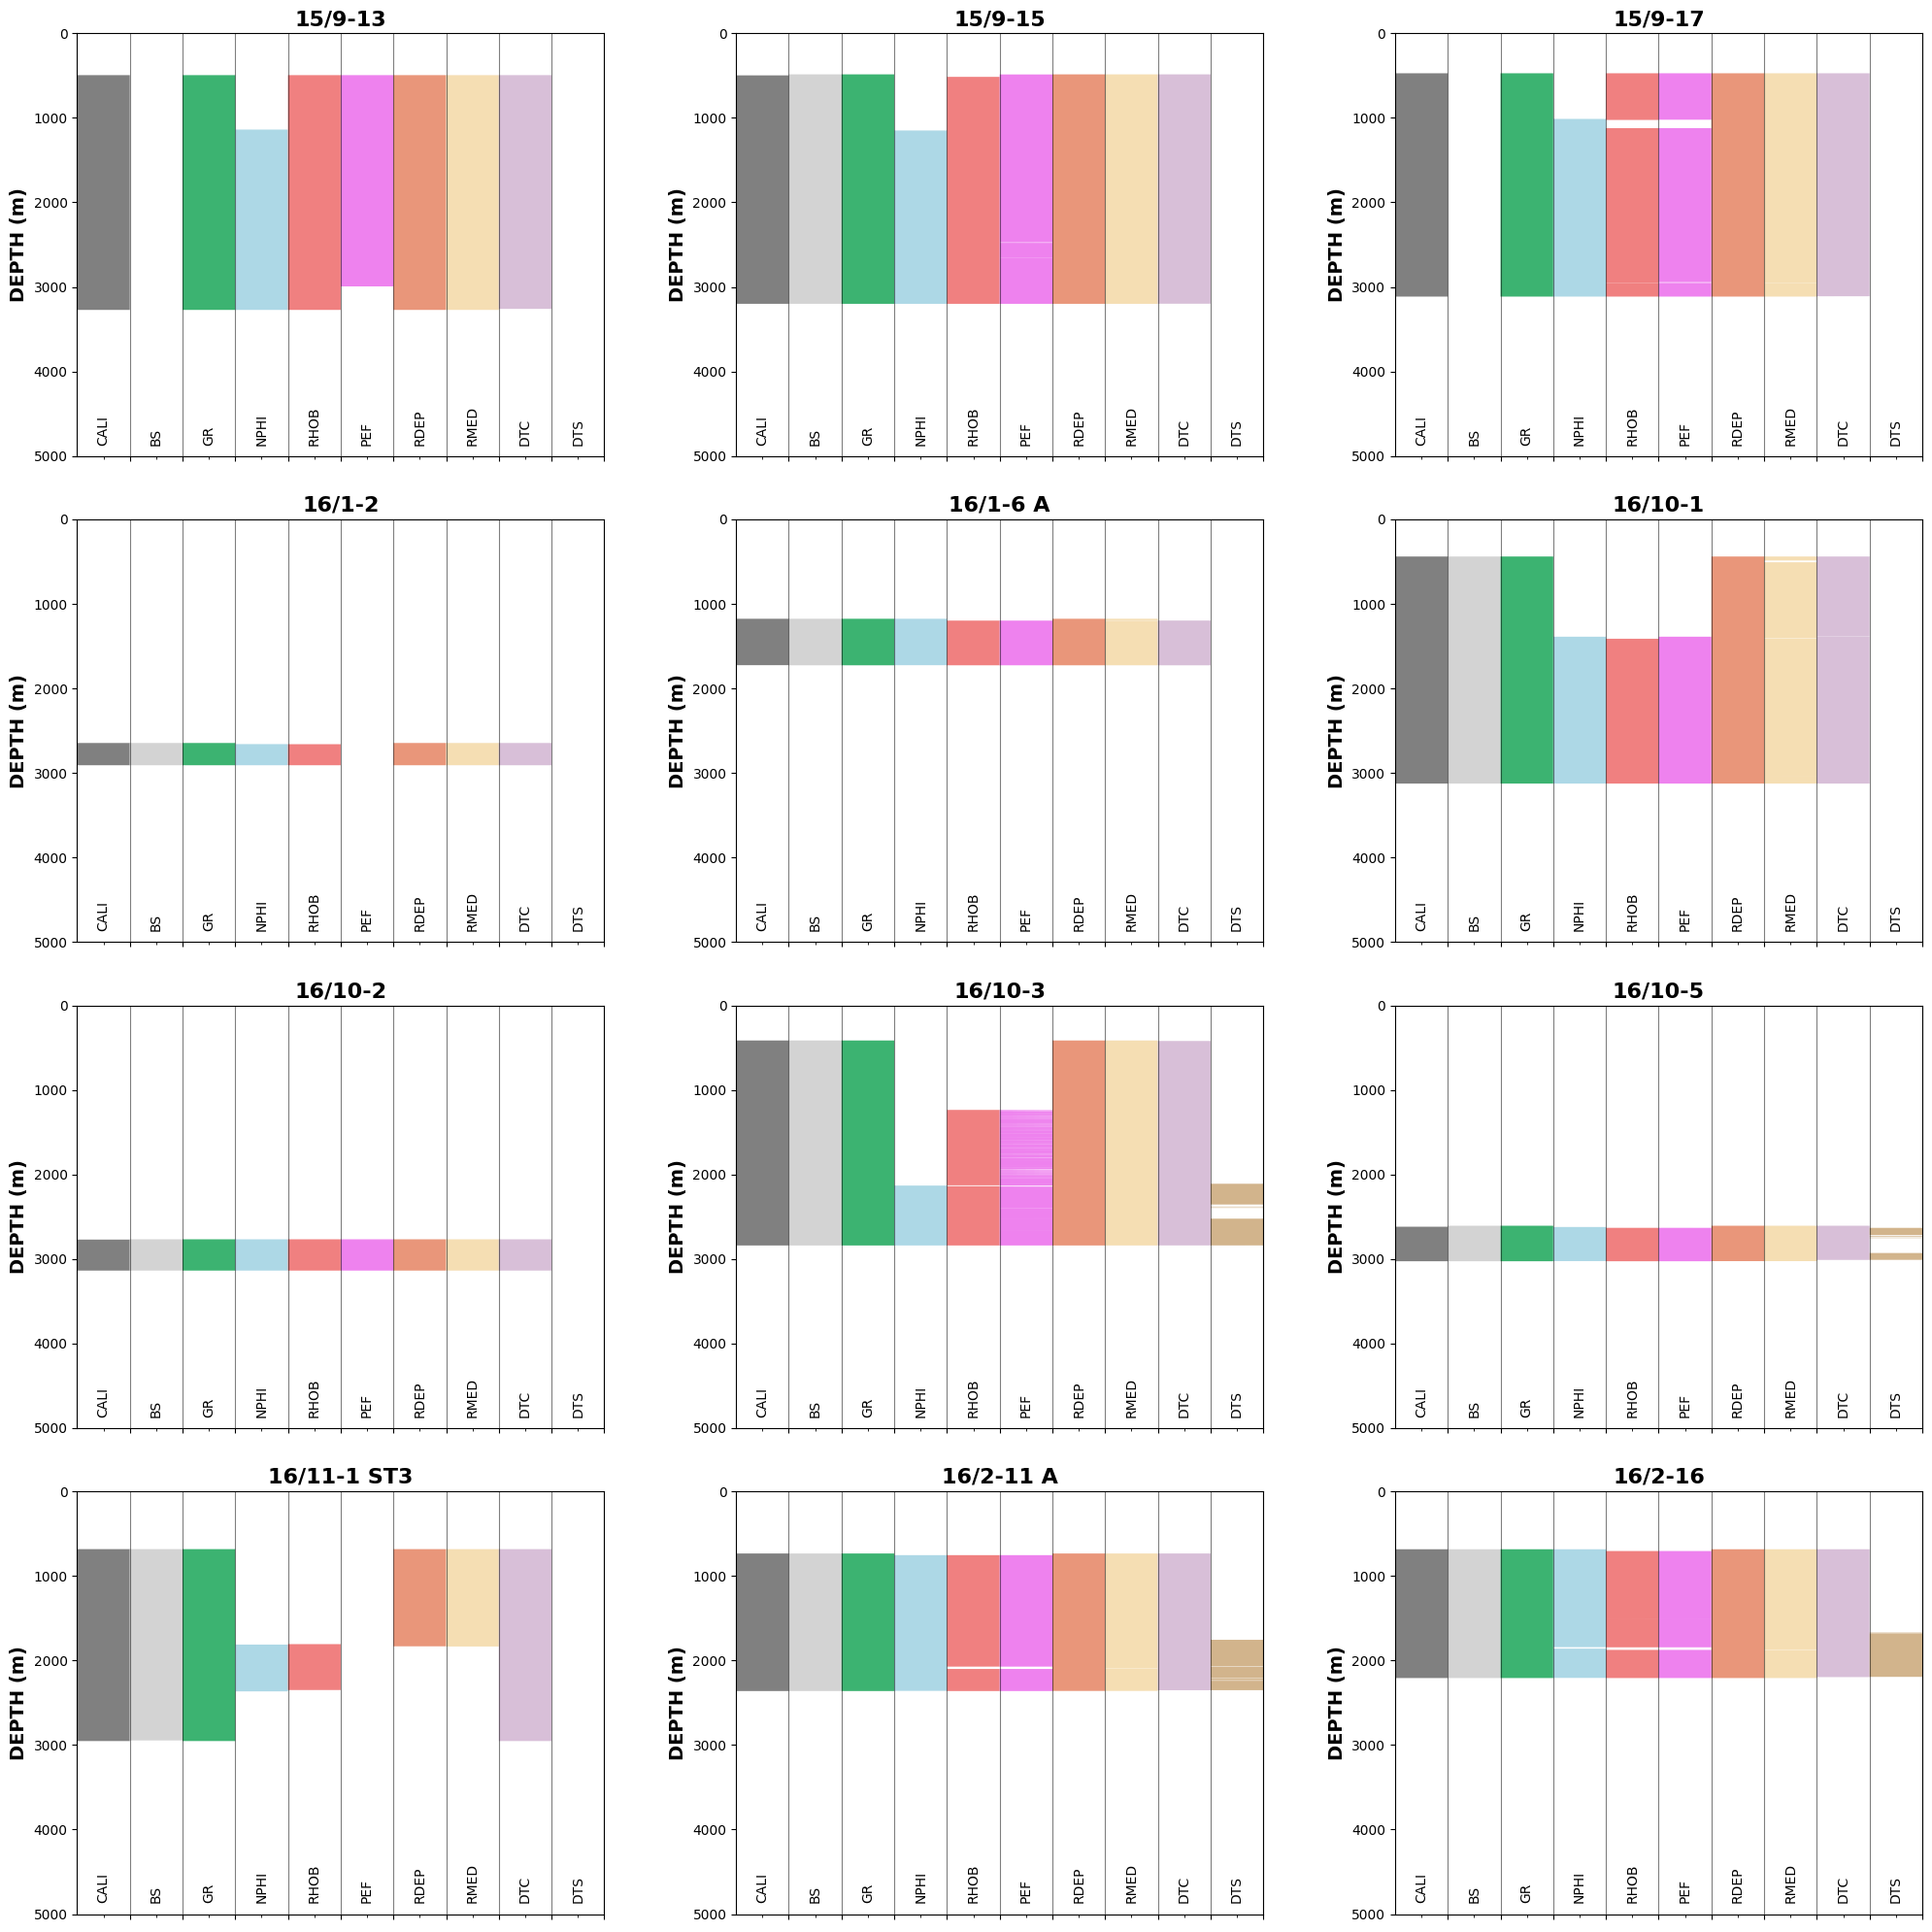

In [38]:
#Setup the labels we want to display on the x-axis
labels = ['CALI', 'BS', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']

#Setup the figure and the subplots
fig, axs = plt.subplots(4, 3, figsize=(20,20))

#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,9)
    
    #Setup the depth range
    ax.set_ylim(5000, 0)
    
    #Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    
    ax.fill_betweenx(df.DEPTH_MD, 0, df.CALI, facecolor='grey')
    ax.fill_betweenx(df.DEPTH_MD, 1, df.BS, facecolor='lightgrey')
    ax.fill_betweenx(df.DEPTH_MD, 2, df.GR, facecolor='mediumseagreen')
    ax.fill_betweenx(df.DEPTH_MD, 3, df.NPHI, facecolor='lightblue')
    ax.fill_betweenx(df.DEPTH_MD, 4, df.RHOB, facecolor='lightcoral')
    ax.fill_betweenx(df.DEPTH_MD, 5, df.PEF, facecolor='violet')
    ax.fill_betweenx(df.DEPTH_MD, 6, df.RDEP, facecolor='darksalmon')
    ax.fill_betweenx(df.DEPTH_MD, 7, df.RMED, facecolor='wheat')
    ax.fill_betweenx(df.DEPTH_MD, 8, df.DTC, facecolor='thistle')
    ax.fill_betweenx(df.DEPTH_MD, 9, df.DTS, facecolor='tan')
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks([1,2,3,4,5,6,7,8,9,10], minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks([0.5, 1.5 ,2.5 ,3.5 ,4.5 ,5.5 ,6.5 , 7.5, 8.5, 9.5], minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')

plt.savefig('missingdata.png')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.savefig(fname='missingdata.png', dpi=300)

From the generated image, we can identify where the gaps are in our main curves. From this plot we can determine which wells would be useful to carry forward for machine learning modelling or for further investigation.

## Getting Familiar With the Data
In this section we will look at a number of visualisations that can be used to gain insight into our data and how that data relations to lithofacies and geological stratigraphy.

### Density - Neutron Distribution by Lithology 
There are multiple plotting and data visualisation libraries with the Python world. One of these is Seaborn, which is a data visualisation library built on top of matplotlib and works closely with pandas. It provides an easy and more intuitive way to display and explore your data.  
  
The following examples illustrate a few different plots that can be used to quickly gain insight into your data using a mixture of FacetGrid and matplotlib.  
  
FacetGrid provides an easier and smoother way of plotting multiple subplots in a grid using a small amount of code.
Before we can use our data, we first have to convert our numeric LITH data to actual descriptive labels. This is achieved by using a simple dictionary:

In [39]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In our dataframe, we create a new column called LITH and using the map function we can quickly get our descriptive labels like so:

In [40]:
data['LITH'] = data['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_numbers)

For the first FacetGrid, we will look at the density-neutron data by formation. When we do this we only need to specify a few lines of code as opposed to multiple lines or using a for loop as seen in the example above with missing data. We can initialise the FacetGrid with the density neutron data and passing the LITH column into the `col` parameter. Additionally, we can use the `col_wrap` parameter to specify how many columns we want on our grid.  
  
Finally, as we are familiar with working with density-neutron data on crossplots using certain scales we need to set the `xlim` and `ylim` accordingly, otherwise it will autoscale.

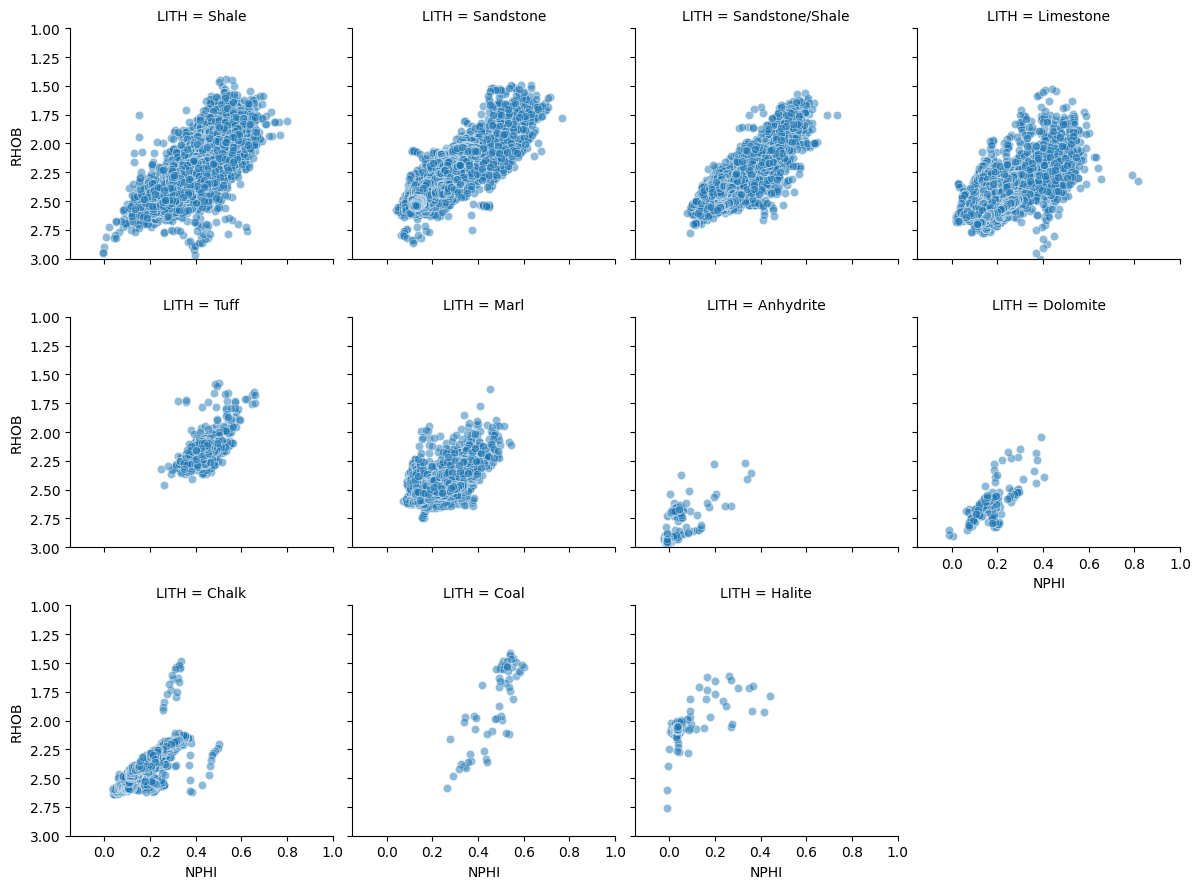

In [41]:
g = sns.FacetGrid(data, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

This will generate a series of mini scatterplots/crossplots of the density-neutron data split by lithology. You can see from the code above, all we had to specify were the type of plot, the axes and setting the axis limits, and from this we have a nice plot we can use right away.

### Density - Neutron Distribution by Lithology and Well
We can further enhance the density neutron data by looking at the lithology distribution across multiple wells. Using the converted LITH data column we can create shading for different lithology types by supplying LITH to the `hue` parameter. We can then supply the WELL column from the dataframe into the `col` parameter.  
  
The marker can be changed by supplying a value to the marker and size parameters. This will help clean up the plots so we can see more of the data.  
  
Finally, as we are using a hue, we can automatically generate a legend using `add_legend()`.

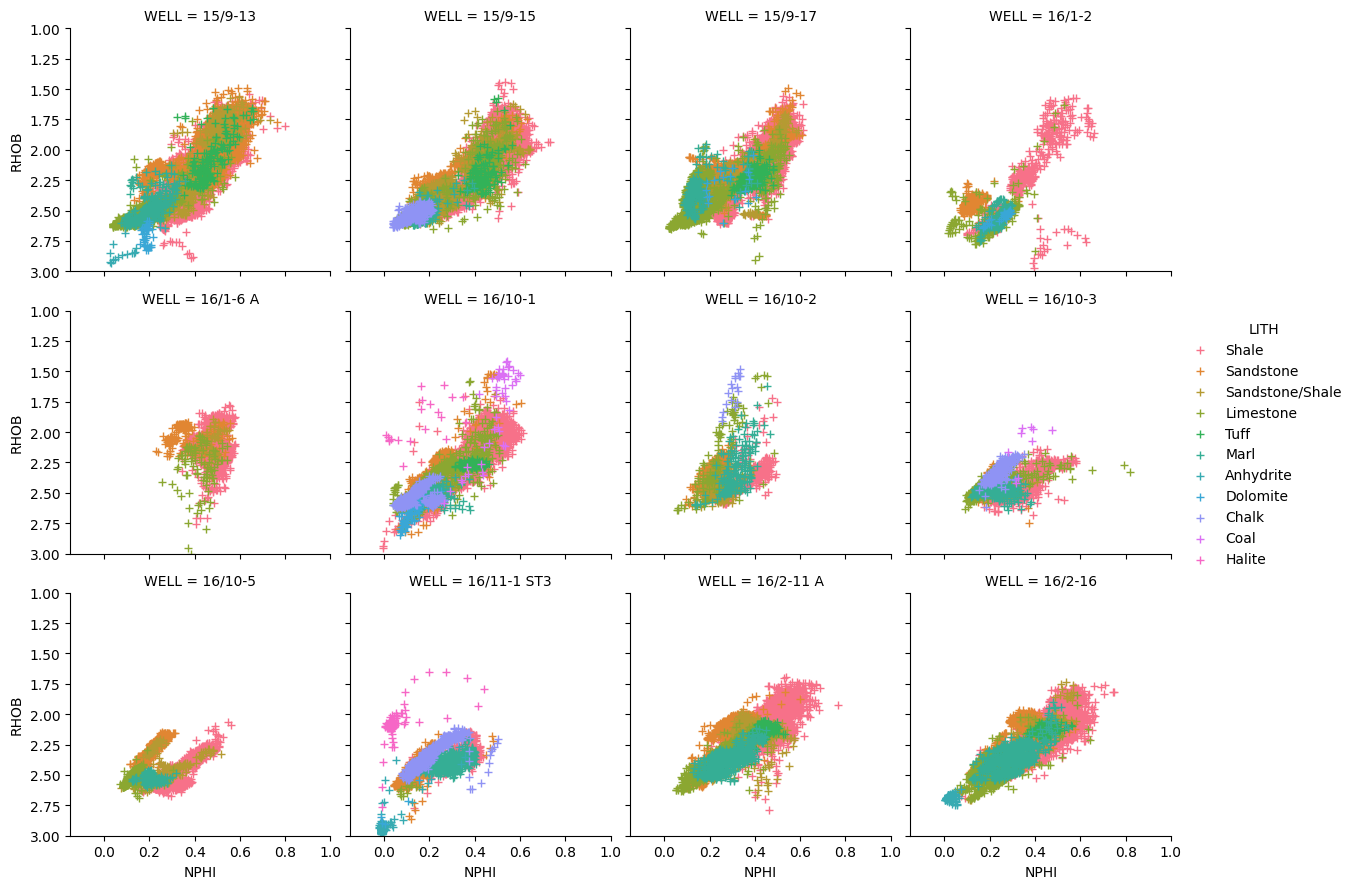

In [51]:
# g = sns.FacetGrid(data, col='WELL', hue='LITH', col_wrap=4)
# g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
# g.set(xlim=(-0.15, 1))
# g.set(ylim=(3, 1))
# g.add_legend()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with your data
g = sns.FacetGrid(data, col='WELL', hue='LITH', col_wrap=4)

# Map the scatter plot on the grid
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, marker='+')

# Set axis limits
g.set(xlim=(-0.15, 1), ylim=(3, 1))

# Automatically handle the legend
g.add_legend()

# Show the plot
plt.show()


### Density - Neutron Distribution by Lithology and Geological Group
We can easily swap out the grouping option for the geological GROUP column to view the lithology variation by group.  
  
From this chart, we can quickly see that the Rotliegendes Gp is primarily sandstone and that the Nordaland Gp is a mixture of Shale and Sandstone/Shale lithologies.

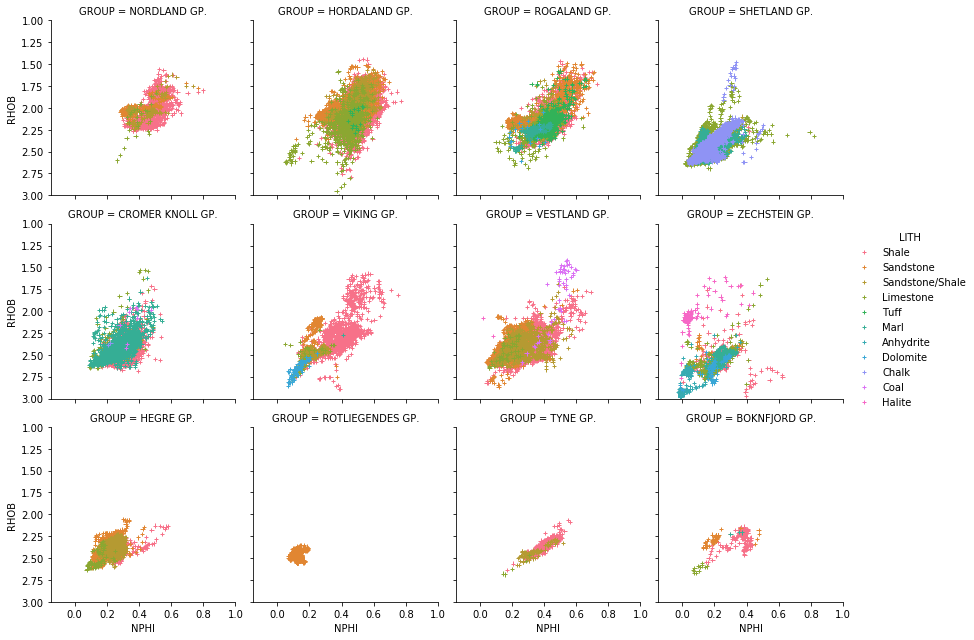

In [ ]:
g = sns.FacetGrid(data, col='GROUP', hue='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

As FacetGrid doesn't easily allow you to colour by a continuous variable, we have to switch to matplotlib. First, we have to group the data by well

### The Seaborn PairPlot
The Seaborn library also has a very powerful visualisation known as a pairplot which can be called through a single line of code. This allows us to compare, on a grid, multiple columns/measurements against the others. The equivalent code in matplotlib would extend several lines.  
  
Prior to displaying the pairplot we need to modify the data we are using. Firstly, we will work with a subset of the data consisting of some commonly used well logs. If we used all of the columns in the example for this article, we would be unable to view the details. Secondly, we need to drop any missing data values, otherwise issues can arise when plotting.  
  
To create a list of the curves we want:

In [ ]:
key_logs = ['CALI', 'GR', 'NPHI', 'RHOB', 'PEF', 'RDEP', 'RMED', 'DTC', 'DTS']

We can then take a subset of our data:

In [ ]:
subset = data[key_logs]

In [ ]:
subset = subset.dropna()

Once we have the list of key curves we can pass it in to the vars argument in the pair plot.

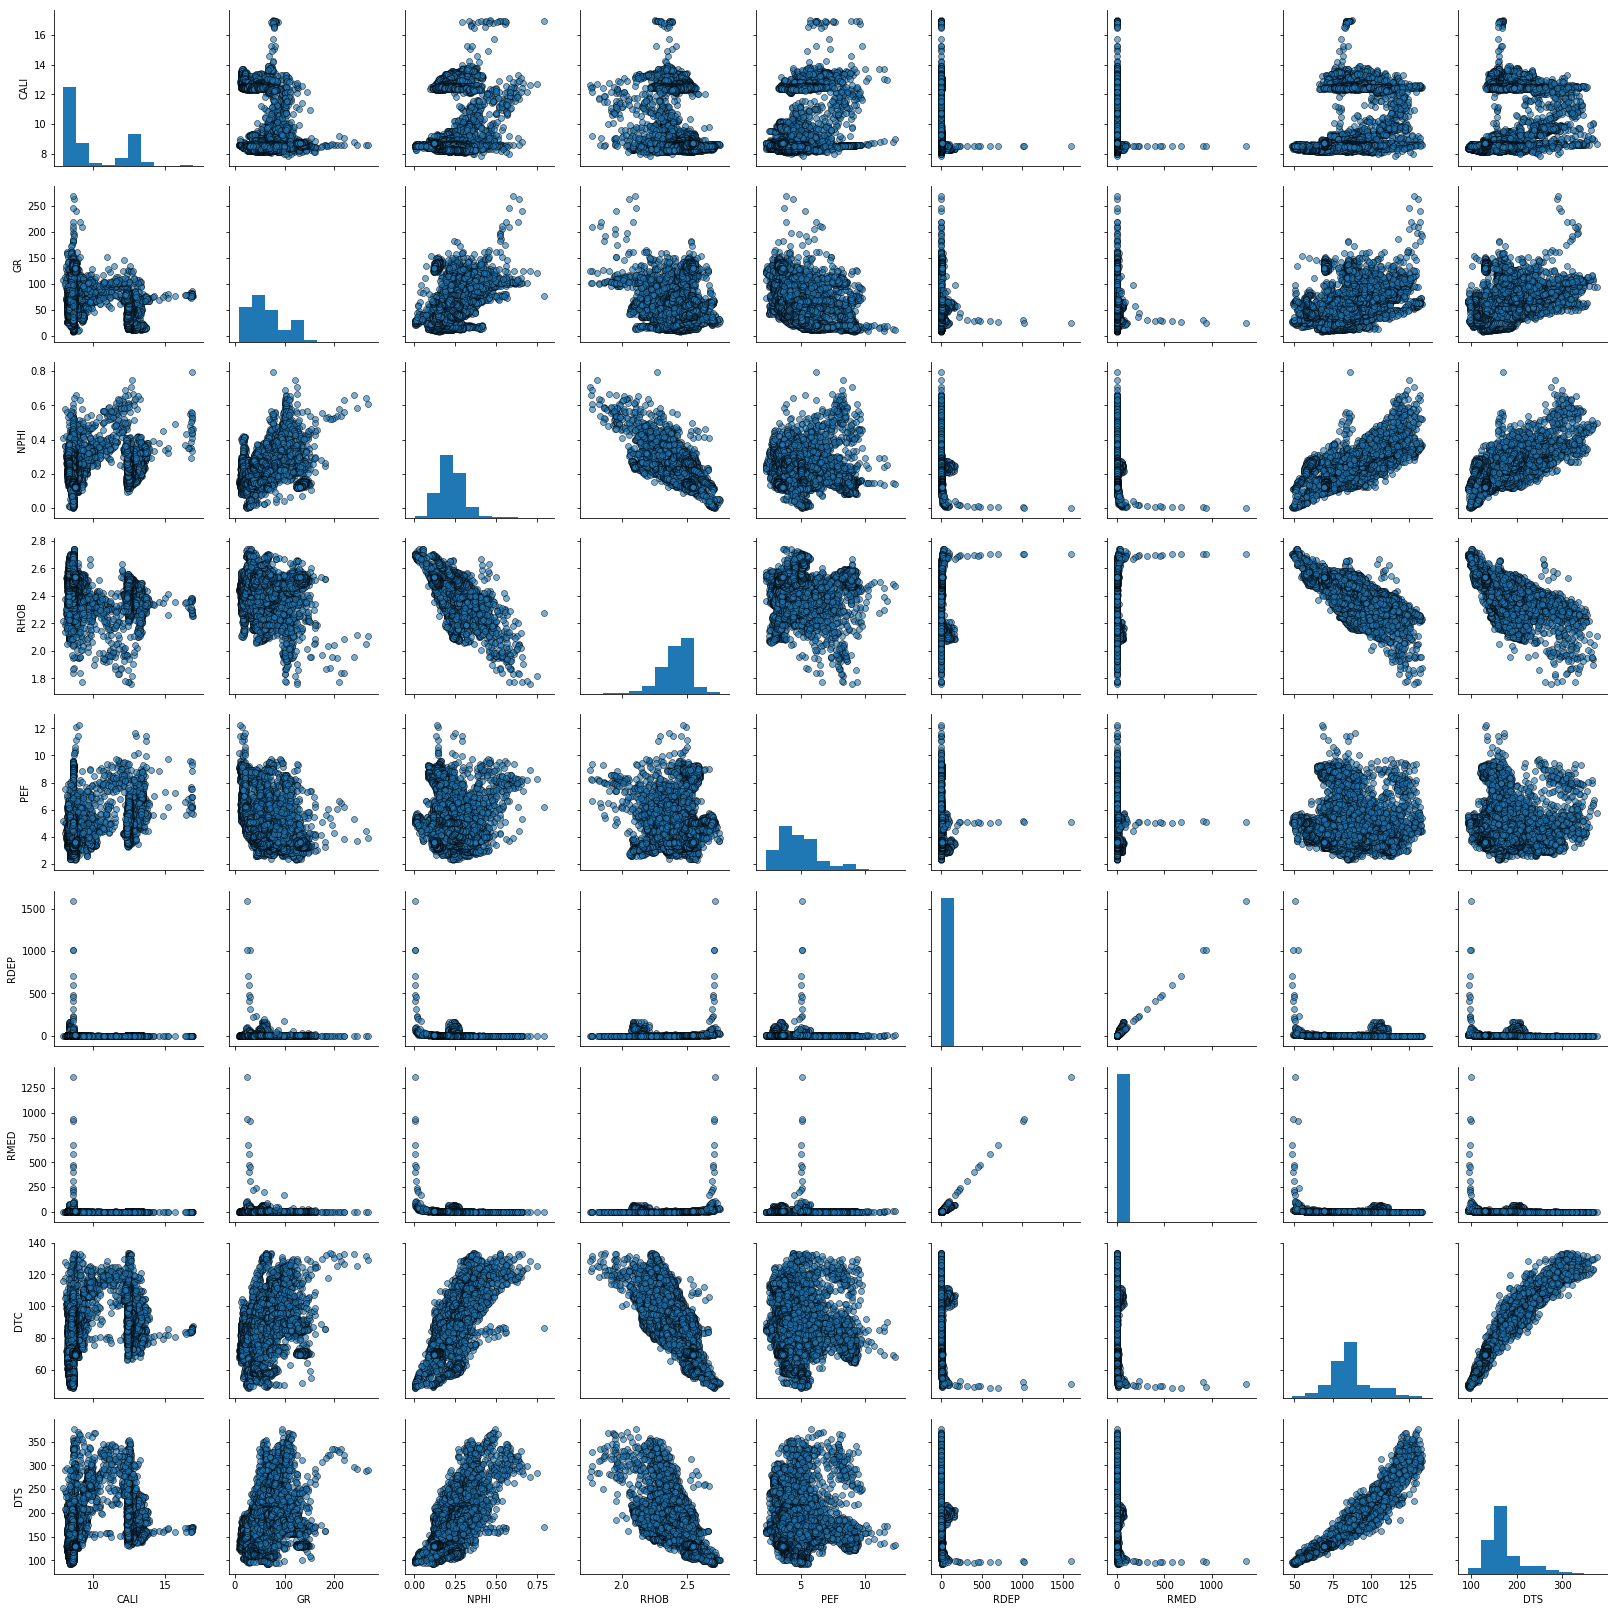

In [ ]:
sns.pairplot(subset, vars=key_logs, diag_kind='hist', plot_kws={'alpha':0.6, 'edgecolor':'k'})

This produces multiple scatter plots with a histogram of each of the curves along the diagonal. As you can see this allows us to quickly understand how data is distributed and correlated between the different logging curves. A very powerful plot!

## Identifying Bad Hole Data
In this section we will briefly look at a way to visualise where we have badhole data caused by borehole enlargement. Deterioration of the borehole wall can happen for a number of different reasons including undercompacted rocks and variations in stresses acting on those rocks such as the mud weight.  
  
As identified in the missing data section only 10 of our wells have a bitsize curve. Therefore, 2 wells will not be plotted. We can use the bitsize curve alongside the caliper curve to create a difference caliper. Negative numbers indicate the borehole has shrunk in size (e.g. shale swelling) and positive numbers indicate the borehole has increased in size.

In [ ]:
data['DIF_CAL'] = data['CALI'] - data['BS']

As we will be using matplotlib for these plots we first need to group the dataframe by WELL:

In [ ]:
grouped = data.groupby('WELL')

In [ ]:
nrows = int(math.ceil(len(grouped)/3.))

Using a small for loop to go through each well and add a subplot of  density vs neutron to our figure. The `c` argument in `df.plot` allows us to specify a column in our dataframe to colour the data. In this case we will use the DIF_CAL data we calculated.

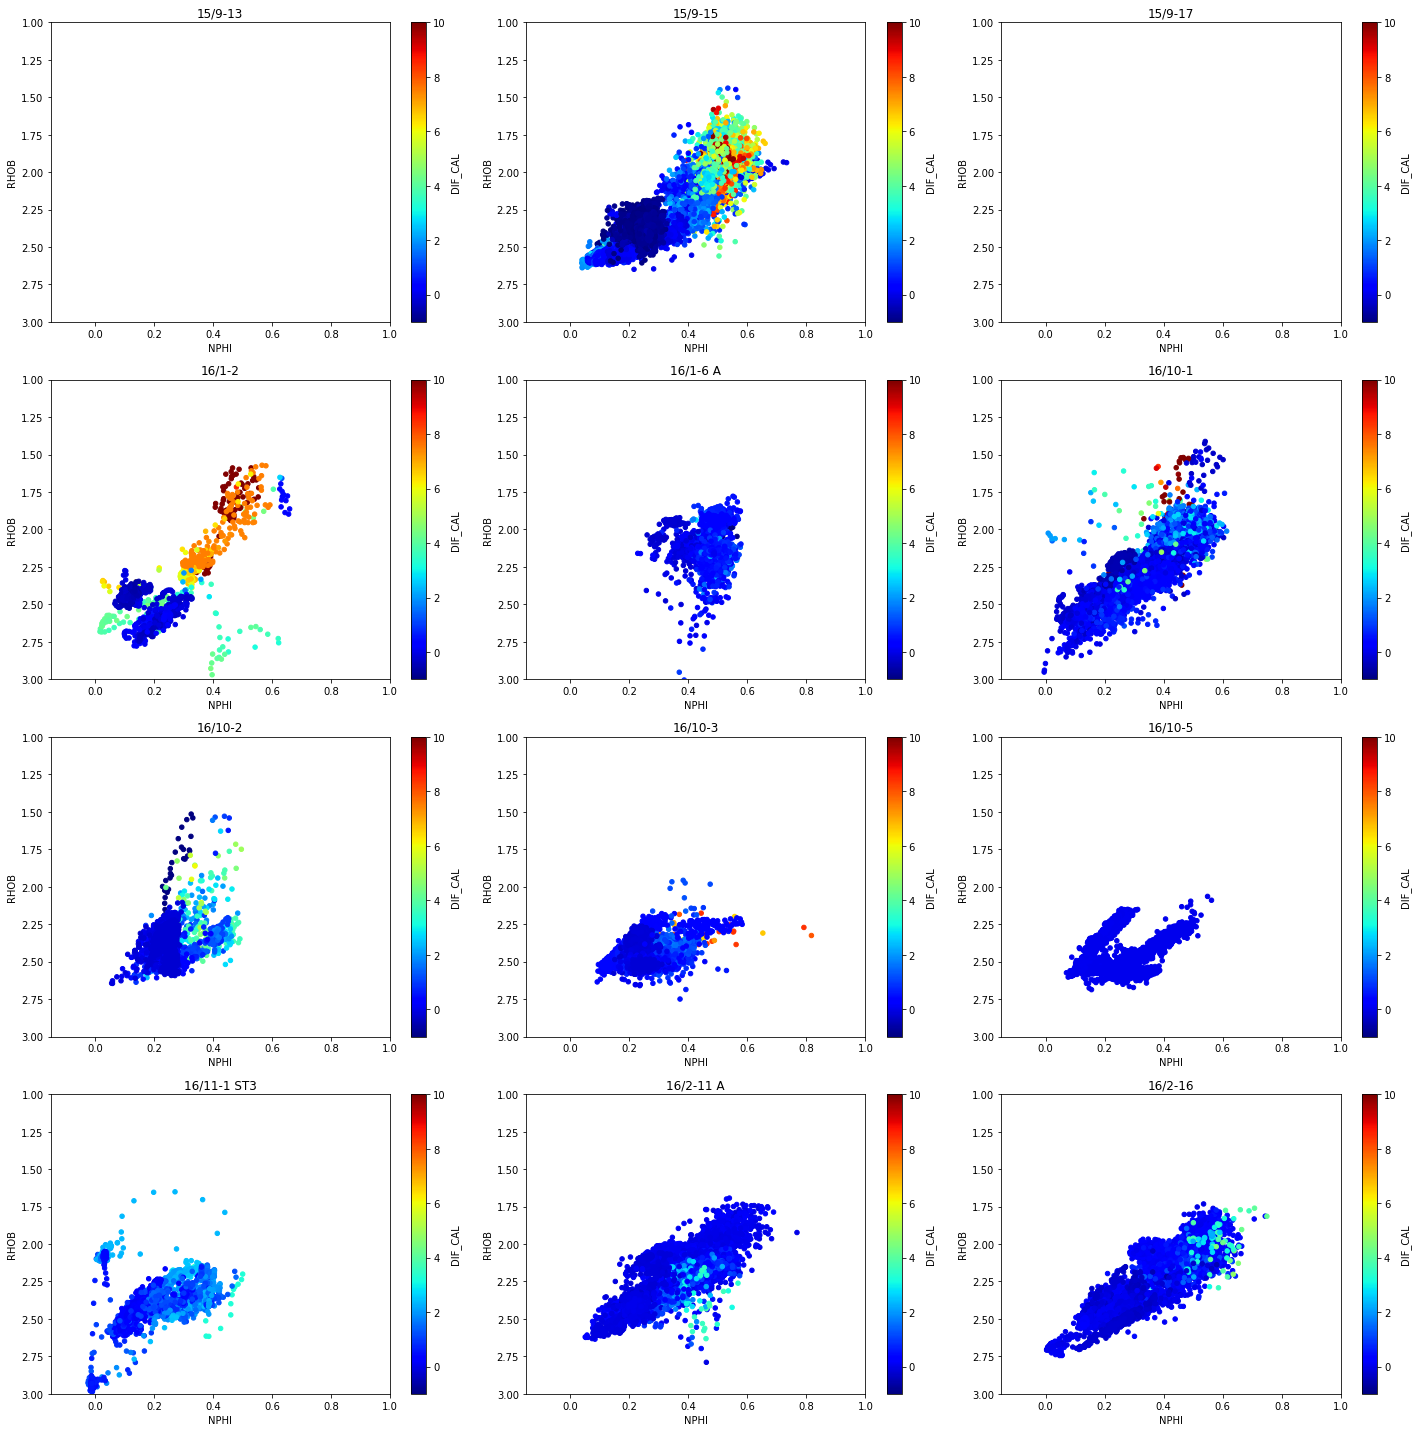

In [ ]:
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', ax=ax, c='DIF_CAL', cmap='jet', vmin=-1, vmax=10)
    ax.set_xlim(-0.15,1)
    ax.set_ylim(3,1)
    ax.set_title(name)
plt.tight_layout()

From a quick glance we can see that we may have issues with the data in two of the wells: 15/9–15 and 16/1–2. These should then be investigated further.  
  
We can also apply the same idea to our lithologies. If we find that a lithology is badly affected by badhole conditions, there could be potential consequences when attempting to predict that lithology using machine learning algorithms.
  
To do this, we group the data by LITH and use the same plotting logic as above.

In [ ]:
grouped_lith = data.groupby('LITH')

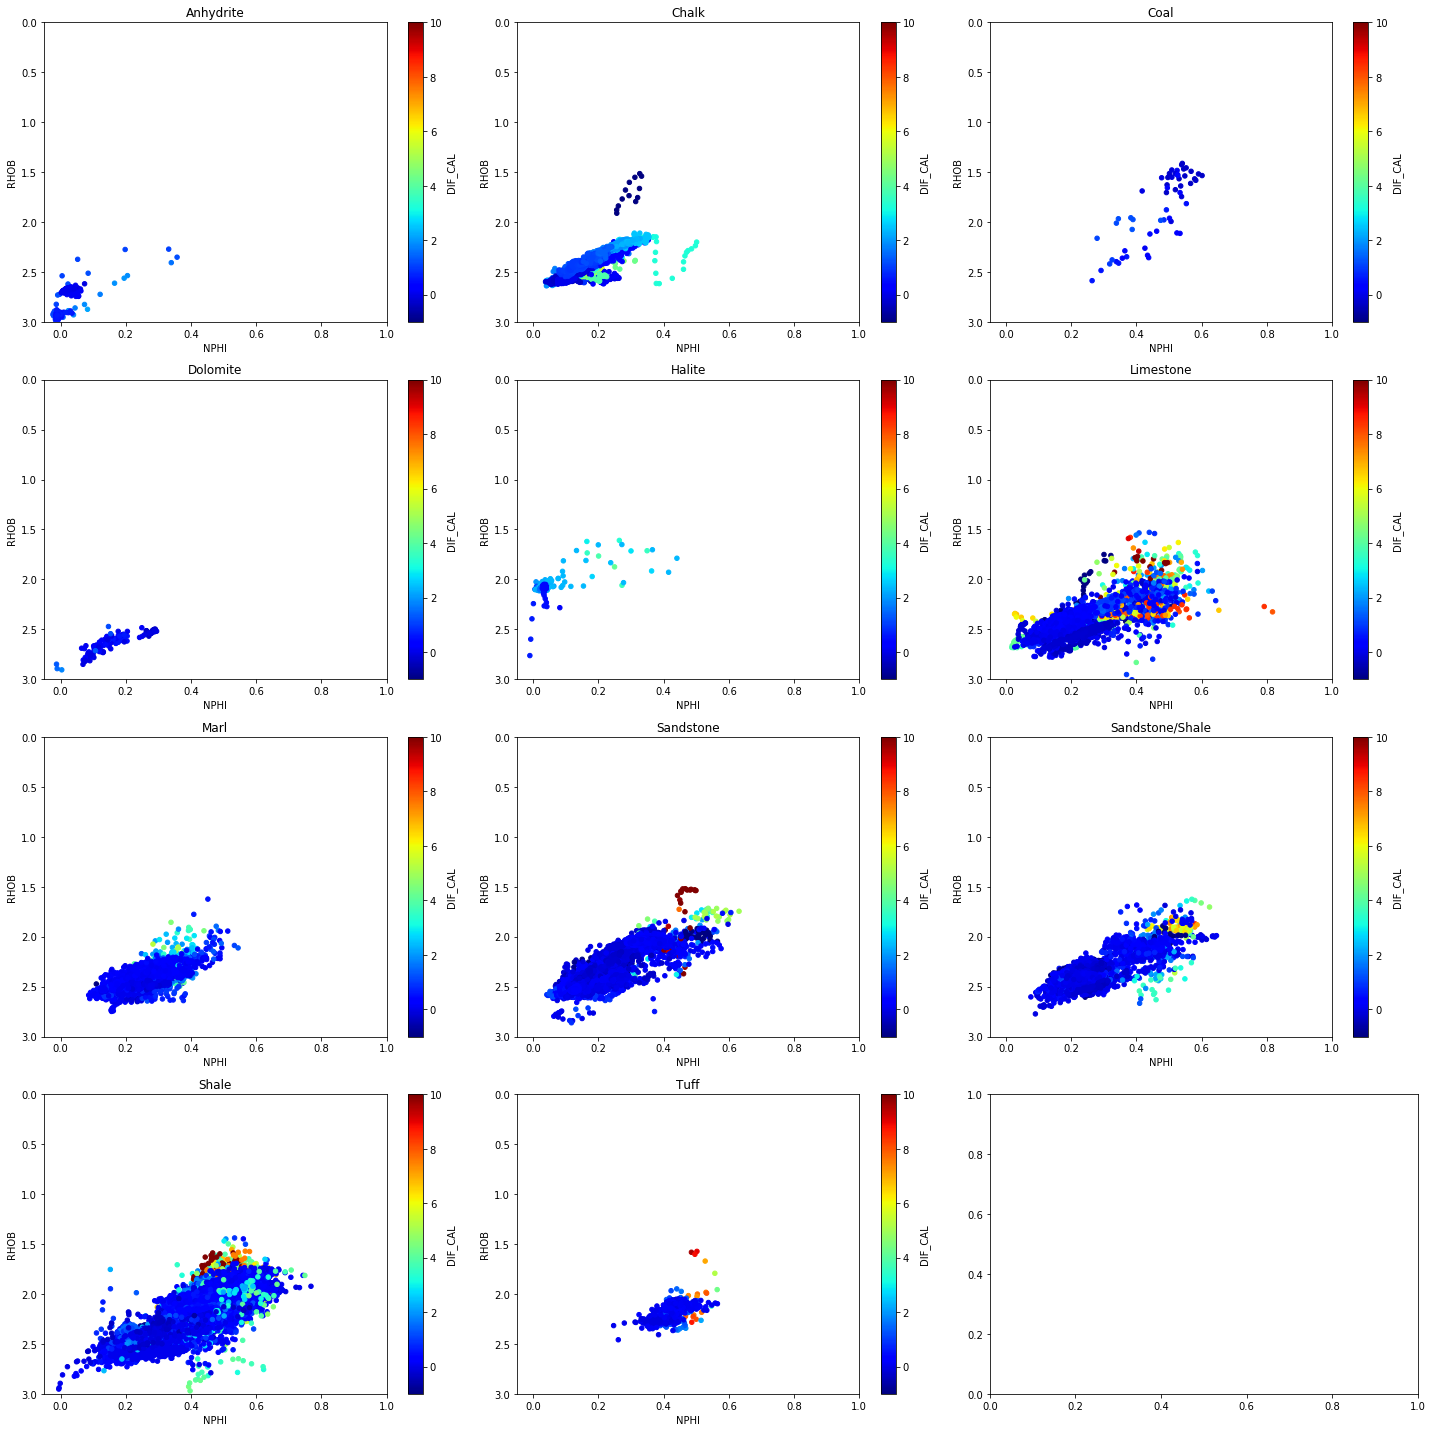

In [ ]:
fig, axs = plt.subplots(nrows, 3, figsize=(20,20))
for (name, df), ax in zip(grouped_lith, axs.flat):
    df.plot(kind='scatter', x='NPHI', y='RHOB', c='DIF_CAL', cmap='jet', ax=ax, vmin=-1, vmax=10)
    ax.set_xlim(-0.05,1)
    ax.set_ylim(3,0)
    ax.set_title(name)
plt.tight_layout()

From the plot, we can see that all lithologies have a large degree of 'good' data in them.

# Conclusion
In this article, we have covered some of thee ways in which you can explore and visualise well log data using common Python libraries. We have seen how to use Seaborn to quickly plot multiple datasets on single figures and split that data by wells and lithology. We have also seen how to quickly identify missing data and data affected by badhole conditions.   
  
Exploring your data is a great way to become familiar with it and understand it, especially prior to carrying out machine learning or further interpretation.

# References
Bormann P., Aursand P., Dilib F., Dischington P., Manral S. 2020. 2020 FORCE Machine Learning Contest. https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition

FORCE: Machine Predicted Lithology: https://xeek.ai/challenges/force-well-logs/overview